# ANALISIS Y PROCESAMIENTO 

In [2]:
# Se importan las librerías que se utilizarán: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as stats
import re

In [6]:
# Se importa el dataset final (CSV) y se visualiza
pelis=pd.read_csv(r'..\\datasets\\peliculas1.csv')
pelis.head(5)


,show_id,tipo,titulo,director,elenco,anio,clasificacion,duracion,listado_en,descripcion,plataforma
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,amazon
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,amazon
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,amazon
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",amazon
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,amazon


In [8]:
# Se observa la cantidad de filas y columnas del dataframe
forma = pelis.shape
f"El dataset tiene {forma[0]} filas y {forma[1]} columnas"

'El dataset tiene 14997 filas y 11 columnas'

In [11]:
pelis.tail(5)

,show_id,tipo,titulo,director,elenco,anio,clasificacion,duracion,listado_en,descripcion,plataforma
14992,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,disney
14993,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,disney
14994,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",disney
14995,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,disney
14996,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,2012,TV-G,2 min,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.,disney


In [12]:
# borramos las columnas que no utilizaremos en esta etapa
pelis = pelis.drop(['tipo', 'descripcion'],axis=1)
pelis

,show_id,titulo,director,elenco,anio,clasificacion,duracion,listado_en,plataforma
0,s1,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014,NaN,113 min,"Comedy, Drama",amazon
1,s2,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"Drama, International",amazon
2,s3,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017,NaN,74 min,"Action, Drama, Suspense",amazon
3,s4,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014,NaN,69 min,Documentary,amazon
4,s5,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989,NaN,45 min,"Drama, Fantasy",amazon
...,...,...,...,...,...,...,...,...,...
14992,s1446,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",disney
14993,s1447,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...",2009,PG,106 min,"Action-Adventure, Comedy, Family",disney
14994,s1448,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...",2016,PG-13,107 min,"Biographical, Comedy, Drama",disney
14995,s1449,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",disney


In [14]:
# Agrupa los datos por los valores de la columna "plataforma" y calcula la suma de valores faltantes por columna en cada grupo
missing_values_por_plataforma = pelis.groupby('plataforma').apply(lambda x: x.isnull().sum()).T

# Muestra los valores faltantes por columna agrupados por "plataforma"
print(missing_values_por_plataforma)

plataforma     amazon  disney  netflix
show_id             0       0        0
titulo              0       0        0
director          229      75      188
elenco            764     119      475
anio                0       0        0
clasificacion     331       1        2
duracion            0       0        3
listado_en          0       0        0
plataforma          0       0        0


### Vemos que aunque hemos eliminado algunas columnas con gran propoción de datos faltantes, quedan algunas filas con datos faltantes en toras columnas </br>
### Dado que no es posible imputar los datos faltantes (por la naturaleza no numérica de los mismos), vamos a eliminar las filas con datos faltantes. 

In [15]:
# borramos las filas con datos faltantes
df=pelis.dropna()
df

,show_id,titulo,director,elenco,anio,clasificacion,duracion,listado_en,plataforma
1,s2,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"Drama, International",amazon
16,s17,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",2016,13+,87 min,"Horror, Science Fiction",amazon
17,s20,Zoe,Drake Doremus,"Ewan McGregor, Léa Seydoux, Theo James, Mirand...",2018,R,104 min,Science Fiction,amazon
18,s23,Zis Boom Bah,William Nigh,"Grace Hayes, Mary Healy",1941,NR,62 min,"Arts, Entertainment, and Culture, Comedy, Drama",amazon
19,s25,Zandalee,Sam Pillsbury,"Nicolas Cage, Judge Reinhold, Erika Anderson, ...",1991,R,94 min,Drama,amazon
...,...,...,...,...,...,...,...,...,...
14992,s1446,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",disney
14993,s1447,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...",2009,PG,106 min,"Action-Adventure, Comedy, Family",disney
14994,s1448,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...",2016,PG-13,107 min,"Biographical, Comedy, Drama",disney
14995,s1449,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",disney


In [16]:
# Se agrupan los datos de acuerdo a los valores de la columna "plataforma" y se calcula la suma de valores faltantes por columna en cada grupo
missing_values_por_plataforma = df.groupby('plataforma').apply(lambda x: x.isnull().sum()).T

# Se muetran los valores faltantes por columna agrupados por "plataforma"
print(missing_values_por_plataforma)

plataforma     amazon  disney  netflix
show_id             0       0        0
titulo              0       0        0
director            0       0        0
elenco              0       0        0
anio                0       0        0
clasificacion       0       0        0
duracion            0       0        0
listado_en          0       0        0
plataforma          0       0        0


### Vemnos que ya no hay datos faltantes.

In [17]:
forma_df = pd.DataFrame({
    'Dataset': ['df'],
    'Filas': [df.shape[0]],
    'Columnas': [df.shape[1]]
})

forma_df

,Dataset,Filas,Columnas
0,df,13042,9


In [19]:
forma_df = df.shape
print(f'El dataset ahora tiene {forma_df[0]} filas y {forma_df[1]} columnas')

El dataset ahora tiene 13042 filas y 9 columnas


In [20]:
# Se observa el tipo de dato de cada columna:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13042 entries, 1 to 14996
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   show_id        13042 non-null  object
 1   titulo         13042 non-null  object
 2   director       13042 non-null  object
 3   elenco         13042 non-null  object
 4   anio           13042 non-null  int64 
 5   clasificacion  13042 non-null  object
 6   duracion       13042 non-null  object
 7   listado_en     13042 non-null  object
 8   plataforma     13042 non-null  object
dtypes: int64(1), object(8)
memory usage: 1018.9+ KB


In [24]:
# Se guarda el dataframe en un CSV
df.to_csv('..\\datasets\\peliculas2.csv', index=False)

In [29]:
#
df=pd.read_csv(r'..\\datasets\\peliculas2.csv')
df

,id,titulo,director,elenco,anio,clasificacion,duracion,listado_en,plataforma
0,s2,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110,"Drama, International",amazon
1,s17,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",2016,13+,87,"Horror, Science Fiction",amazon
2,s20,Zoe,Drake Doremus,"Ewan McGregor, Léa Seydoux, Theo James, Mirand...",2018,R,104,Science Fiction,amazon
3,s23,Zis Boom Bah,William Nigh,"Grace Hayes, Mary Healy",1941,NR,62,"Arts, Entertainment, and Culture, Comedy, Drama",amazon
4,s25,Zandalee,Sam Pillsbury,"Nicolas Cage, Judge Reinhold, Erika Anderson, ...",1991,R,94,Drama,amazon
...,...,...,...,...,...,...,...,...,...
13038,s1446,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",disney
13039,s1447,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...",2009,PG,106 min,"Action-Adventure, Comedy, Family",disney
13040,s1448,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...",2016,PG-13,107 min,"Biographical, Comedy, Drama",disney
13041,s1449,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",disney


## Limpieza columna duracion

In [30]:
# usamos una expresión regular para dejar solo valores numéricos y luego convertimos a tipo integer
df['duracion'] = df['duracion'].apply(lambda x: re.sub(r'[^0-9]', '', x)).astype(int)

In [31]:
# Se verifica que se haya eliminado "min" y que se haya cambiado el tipo de dato 
uniquedur = df['duracion'].unique()
print(uniquedur)

[110  87 104  62  94  86 103   9  18  14  20  19  22  60   6  54   5  84
 126 125 109  89  85 111  95  99  78  77  55 115  58  49 135  64  59 122
  92  90 102  65 114  56 136  70 138 113 100 152  68  57  96  98  88 151
 149 141 121  48 140 106  27  69 107 108  91  93  38 157 118 112  15 142
  75  71  52  66 159  67 164 116  73  80  61  79  83  44  45 120  53  97
  74 105  82  50 127 101 161  72  81  33 123  43   0 124 143  35  47 170
   3 146 132 154 128 133 153 148 119  63 169 174 144 137  76 134 163 139
 145 162  32  46  39  41 147 155 117 167  30   2  42 129 178  24 171 172
 173  31   7 166 160 130  13  11  51   8  17  40 158 131   4 183  10  25
  12 150  16  23 181 156  34  21 177 550  28 193 165 175  36 180 188 187
 176 168 190 185 209 192 182  26   1 207 540  37 269 191 229 189 204 212
 224  29 203 194 233 237 230 195 253 208 186 214 179 200 196 228 205 201]


In [32]:
# Se consultan las estadísticas que describen los valores numéricos del dataframe: (anio y duracion)
df.describe()

,anio,duracion
count,13043.000000,13043.000000
mean,2008.417312,97.093613
std,17.613108,29.542790
min,1920.000000,0.000000
25%,2006.000000,84.000000
50%,2015.000000,96.000000
75%,2019.000000,112.000000
max,2021.000000,550.000000


In [34]:
# Contamos la cantidad de filas para cada clasificacion
contar_clas = df['duracion'].value_counts()
print(contar_clas)

duracion
90     352
91     352
94     332
92     317
93     314
      ... 
540      1
207      1
1        1
550      1
201      1
Name: count, Length: 216, dtype: int64


## Limpieza columna clasificacion

In [35]:
# Se cuentan la cantidad de filas para cada clasificacion
contar_clas2 = df['clasificacion'].value_counts()
print(contar_clas2)

clasificacion
TV-MA       1842
R           1778
13+         1737
TV-14       1300
16+         1220
18+         1068
PG-13        925
PG           751
TV-PG        575
ALL          547
G            346
TV-G         259
7+           237
NR           164
TV-Y7        137
TV-Y         100
UNRATED       33
TV-Y7-FV       8
NC-17          4
UR             3
NOT_RATE       3
AGES_18_       3
AGES_16_       2
16             1
Name: count, dtype: int64


### Vemos que hay muchas categorías repetidas ya que los datos no están normalizados. Procedemos a limpiar y normalizar.

In [36]:
df['clasificacion'] = df['clasificacion'].replace(['UNRATED', 'UR'], 'UR/No clasificado')
df['clasificacion'] = df['clasificacion'].replace(['NOT RATED', 'NOT_RATE', 'NR'], 'NR/Sin clasificacion')
df['clasificacion'] = df['clasificacion'].replace(['ALL', 'ALL_AGES'], 'ALL')
df['clasificacion'] = df['clasificacion'].replace(['AGES_18_'], '18+')
df['clasificacion'] = df['clasificacion'].replace(['16','AGES_16_','16+'], '16+')

In [37]:
# Se cuenta la cantidad de filas para cada clasificacion
contar_clas3 = df['clasificacion'].value_counts()
print(contar_clas3)

clasificacion
TV-MA                   1842
R                       1778
13+                     1737
TV-14                   1300
16+                     1223
18+                     1071
PG-13                    925
PG                       751
TV-PG                    575
ALL                      547
G                        346
TV-G                     259
7+                       237
NR/Sin clasificacion     167
TV-Y7                    137
TV-Y                     100
UR/No clasificado         36
TV-Y7-FV                   8
NC-17                      4
Name: count, dtype: int64


### Datos de clasificación normalizados, procedemos a graficar. 

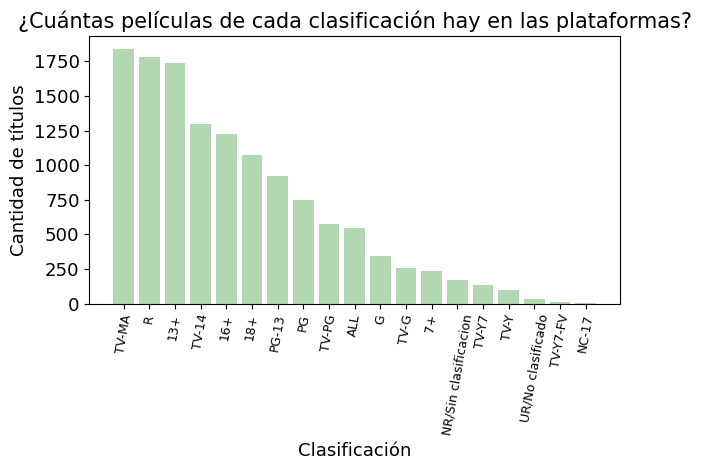

In [38]:
# Se crea el gráfico de barras
plt.bar(contar_clas3.index, contar_clas3.values, color="green", alpha=0.3)
plt.xlabel('Clasificación', fontsize=13)
plt.ylabel('Cantidad de títulos', fontsize=13)
plt.title('¿Cuántas películas de cada clasificación hay en las plataformas?', fontsize=15)
plt.xticks(rotation=80, fontsize=9)
plt.yticks(fontsize=13)
plt.tight_layout()

# Se muestra el gráfico
plt.show()

## ¿Cuántas películas de cada año hay en cada plataforma?

<Figure size 1500x600 with 0 Axes>

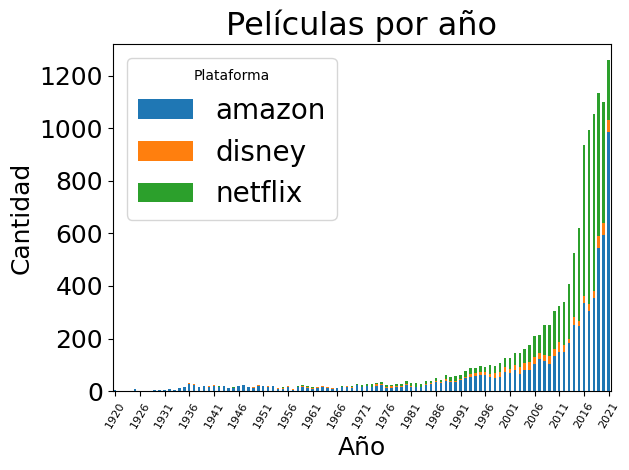

In [39]:
# Agrupar por tipo y anio, y contar la cantidad de filas
contar_anio = df.groupby(['anio', 'plataforma']).size().unstack()

# Crear un gráfico de barras apiladas con anio en el eje x
plt.figure(figsize=(15, 6))
contar_anio.plot(kind='bar', stacked=True)
plt.xlabel('Año', fontsize = 18)
plt.ylabel('Cantidad', fontsize = 18)
plt.title('Películas por año', fontsize = 23)
plt.legend(title='Plataforma', fontsize = 20)
plt.xticks(range(0, len(contar_anio), 5), rotation = 60, fontsize = 8) 
plt.yticks(fontsize = 18)
plt.tight_layout()
plt.show()

## Columna listado_en: categorías y géneros¶


In [40]:
df['listado_en'].head(10)

0                               Drama, International
1                            Horror, Science Fiction
2                                    Science Fiction
3    Arts, Entertainment, and Culture, Comedy, Drama
4                                              Drama
5                                              Drama
6                                              Drama
7                          Fitness, Special Interest
8           Faith and Spirituality, Special Interest
9                          Fitness, Special Interest
Name: listado_en, dtype: object

In [41]:
# Se corrigen los duplicados

df['listado_en'] = df['listado_en'].replace(' Sports movies', ' Sports')
df['listado_en'] = df['listado_en'].replace([' Romantic movies','Romantic Movies'], ' Romance')
df['listado_en'] = df['listado_en'].replace(['Comedies',' Comedies',' Comedy' ], 'Comedy')
df['listado_en'] = df['listado_en'].replace(['Documentaries',' Documentaries',' Documentary'],'Documentary')
df['listado_en'] = df['listado_en'].replace([' Dramas',' Drama','drama','Dramas'], 'Drama')
df['listado_en'] = df['listado_en'].replace('Action & Adventure', 'Action-Adventure')
df['listado_en'] = df['listado_en'].replace(' Adventure', 'Adventure')
df['listado_en'] = df['listado_en'].replace(['Animation',' Animation'],'Animation')
df['listado_en'] = df['listado_en'].replace('LGBTQ Movies', 'LGBTQ')
df['listado_en'] = df['listado_en'].replace(['Music & Musicals','Music Videos and Concerts'], 'Musical')
df['listado_en'] = df['listado_en'].replace([' Faith & Spirituality',' Faith and Spirituality'], 'Faith and Spirituality')
df['listado_en'] = df['listado_en'].replace([' Horror Movies', 'Horror Movies',' Horror' ], 'Horror')
df['listado_en'] = df['listado_en'].replace([' International Movies','International Movies',' International'], 'International')
df['listado_en'] = df['listado_en'].replace([' Thrillers', 'Thrillers'], ' Thriller')
print(df['listado_en'])

0                                   Drama, International
1                                Horror, Science Fiction
2                                        Science Fiction
3        Arts, Entertainment, and Culture, Comedy, Drama
4                                                  Drama
                              ...                       
13038          Action-Adventure, Family, Science Fiction
13039                   Action-Adventure, Comedy, Family
13040                        Biographical, Comedy, Drama
13041                       Buddy, Comedy, Coming of Age
13042      Action-Adventure, Animals & Nature, Animation
Name: listado_en, Length: 13043, dtype: object


In [42]:
df['listado_en'].unique()                    # Obtengo los valores unicos de la columna listado_en (generos)

array(['Drama, International', 'Horror, Science Fiction',
       'Science Fiction',
       'Arts, Entertainment, and Culture, Comedy, Drama', 'Drama',
       'Fitness, Special Interest',
       'Faith and Spirituality, Special Interest', 'Special Interest',
       'Action, Military and War, Western',
       'Fantasy, Science Fiction, Suspense', 'Suspense',
       'Documentary, LGBTQ', 'Action, Drama', 'Drama, Suspense', 'Comedy',
       'Western', 'Action, Drama, Sports',
       'Documentary, Special Interest',
       'Arts, Entertainment, and Culture, Comedy',
       'Arts, Entertainment, and Culture, Comedy, Special Interest',
       'Documentary, International, Special Interest',
       'Comedy, Science Fiction', 'Action', 'Documentary',
       'Arts, Entertainment, and Culture', 'Action, Science Fiction',
       'Documentary, Faith and Spirituality, Special Interest',
       'Action, Drama, Special Interest', 'Drama, Young Adult Audience',
       'Drama, Military and War', 'Arthous

In [213]:
# Se dividen los valores en columnas separadas, al mismo tiempo se genera un dataset nuevo de generos, que relaciona los id con los generos de cada pelicula
generos = pd.concat([df['id'],df['listado_en'].str.split(',', expand=True)], axis=1)
generos

,id,0,1,2,3,4
0,s2,Drama,International,None,None,None
1,s17,Horror,Science Fiction,None,None,None
2,s20,Science Fiction,None,None,None,None
3,s23,Arts,Entertainment,and Culture,Comedy,Drama
4,s25,Drama,None,None,None,None
...,...,...,...,...,...,...
13038,s1446,Action-Adventure,Family,Science Fiction,None,None
13039,s1447,Action-Adventure,Comedy,Family,None,None
13040,s1448,Biographical,Comedy,Drama,None,None
13041,s1449,Buddy,Comedy,Coming of Age,None,None


In [214]:
# Se guarda el dataframe en un archivo CSV
generos.to_csv(r'C:\\Users\\Usuario\\Desktop\\data science\\GRUPO 9 FINAL\generos.csv', index=False)

In [215]:
# Se nombran las columnas
generos.columns = ['show_id', 'gen1', 'gen2', 'gen3', 'gen4', 'gen5']
generos

,show_id,gen1,gen2,gen3,gen4,gen5
0,s2,Drama,International,None,None,None
1,s17,Horror,Science Fiction,None,None,None
2,s20,Science Fiction,None,None,None,None
3,s23,Arts,Entertainment,and Culture,Comedy,Drama
4,s25,Drama,None,None,None,None
...,...,...,...,...,...,...
13038,s1446,Action-Adventure,Family,Science Fiction,None,None
13039,s1447,Action-Adventure,Comedy,Family,None,None
13040,s1448,Biographical,Comedy,Drama,None,None
13041,s1449,Buddy,Comedy,Coming of Age,None,None


Se observa que la columna listado_en contiene varios valores separados por comas. Se separa cada valor en una columna para poder utilizarlas para agrupar las filas.

# Depurando lista de categorías y géneros

Encontrar todos los posibles géneros y categorías, sin repeticiones:

In [216]:
#Se borran las columnas que no se utilizarán 
gen=generos.drop(['gen2','gen3','gen4','gen5'],axis=1)
gen

,show_id,gen1
0,s2,Drama
1,s17,Horror
2,s20,Science Fiction
3,s23,Arts
4,s25,Drama
...,...,...
13038,s1446,Action-Adventure
13039,s1447,Action-Adventure
13040,s1448,Biographical
13041,s1449,Buddy


In [217]:
#Se concatena la columna gen1
pelic=pd.concat([df,gen],axis=1,join='outer')


Como la columna: listado_en posee el género o la denominación que establece la plataforma. Se observan multiples datos. En primer lugar se reducieron esos datos al renombrar los géneros, y categorías re agrupando los mismos. En segundo ligar se separaron en 5 generos, creando 5 columnas. Luego de estudiarlos y analizarlos se decide dejar el género más representativo que es el de la columna gen1.

In [218]:
#Se borran las columnas repetidas y que ya se limpiaron
pel=pelic.drop(['show_id','listado_en'],axis=1)
pel

,id,titulo,director,elenco,anio,clasificacion,duracion,plataforma,gen1
0,s2,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110,amazon,Drama
1,s17,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",2016,13+,87,amazon,Horror
2,s20,Zoe,Drake Doremus,"Ewan McGregor, Léa Seydoux, Theo James, Mirand...",2018,R,104,amazon,Science Fiction
3,s23,Zis Boom Bah,William Nigh,"Grace Hayes, Mary Healy",1941,NR/Sin clasificacion,62,amazon,Arts
4,s25,Zandalee,Sam Pillsbury,"Nicolas Cage, Judge Reinhold, Erika Anderson, ...",1991,R,94,amazon,Drama
...,...,...,...,...,...,...,...,...,...
13038,s1446,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...",2009,PG-13,108,disney,Action-Adventure
13039,s1447,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...",2009,PG,106,disney,Action-Adventure
13040,s1448,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...",2016,PG-13,107,disney,Biographical
13041,s1449,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...",2003,PG-13,112,disney,Buddy


In [219]:
pel5=pel['gen1'].unique()
pel5

array(['Drama', 'Horror', 'Science Fiction', 'Arts', 'Fitness',
       'Faith and Spirituality', 'Special Interest', 'Action', 'Fantasy',
       'Suspense', 'Documentary', 'Comedy', 'Western', 'Arthouse',
       'Military and War', 'Anime', 'International', 'Kids', 'Sports',
       'Adventure', 'Animation', 'Romance', 'Music Videos and Concerts',
       'Young Adult Audience', 'Musical', 'LGBTQ', 'Historical',
       'Children & Family Movies', 'Dramas', 'Comedies', ' Thriller',
       'Horror Movies', 'Action & Adventure', 'Action-Adventure',
       'Documentaries', 'International Movies', 'Sci-Fi & Fantasy',
       'Classic Movies', 'Stand-Up Comedy', 'Movies', 'Anime Features',
       'Cult Movies', 'Independent Movies', 'Music & Musicals',
       ' Romance', 'LGBTQ Movies', 'Biographical', 'Coming of Age',
       'Concert Film', 'Family', 'Crime', 'Animals & Nature', 'Dance',
       'Buddy', 'Anthology'], dtype=object)

In [220]:
print(heapq.nlargest(10, pel5))

['Young Adult Audience', 'Western', 'Suspense', 'Stand-Up Comedy', 'Sports', 'Special Interest', 'Science Fiction', 'Sci-Fi & Fantasy', 'Romance', 'Musical']


# generar un gráfico con los 10 géneros más frecuentes en las peílculas, ojo porque hay géneros que no se remmplazaron 


# Depurado columna director

In [221]:
# Se dividen los valores en columnas separadas, al mismo tiempo se genera un dataset nuevo de directores, que relaciona los id con los generos de cada pelicula
directores = pd.concat([df['id'],df['director'].str.split(',', expand=True)], axis=1)


In [222]:
# Se guarda el dataframe en un archivo CSV
directores.to_csv(r'C:\\Users\\Usuario\\Desktop\\data science\\GRUPO 9 FINAL\directores.csv', index=False)

In [223]:
directores.columns = ['show_id', 'director1', 'director2', 'director3', 'director4', 'director5','director6', 'director7', 'director8', 'director9', 'director10','director11', 'director12', 'director13', 'director14', 'director15', 'director16', 'director17']
directores

,show_id,director1,director2,director3,director4,director5,director6,director7,director8,director9,director10,director11,director12,director13,director14,director15,director16,director17
0,s2,Girish Joshi,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,s17,Glenn Miller,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,s20,Drake Doremus,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,s23,William Nigh,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,s25,Sam Pillsbury,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13038,s1446,Gavin Hood,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
13039,s1447,Shawn Levy,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
13040,s1448,Dexter Fletcher,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
13041,s1449,Gurinder Chadha,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [224]:
#Se borran las columnas que no se utilizarán 
directores1=directores.drop(['director6','director7', 'director8','director9','director10', 'director11','director12', 'director13', 'director14', 'director15','director16', 'director17'],axis=1)
directores1

,show_id,director1,director2,director3,director4,director5
0,s2,Girish Joshi,None,None,None,None
1,s17,Glenn Miller,None,None,None,None
2,s20,Drake Doremus,None,None,None,None
3,s23,William Nigh,None,None,None,None
4,s25,Sam Pillsbury,None,None,None,None
...,...,...,...,...,...,...
13038,s1446,Gavin Hood,None,None,None,None
13039,s1447,Shawn Levy,None,None,None,None
13040,s1448,Dexter Fletcher,None,None,None,None
13041,s1449,Gurinder Chadha,None,None,None,None


In [225]:
directores2 =pd.concat([directores1['director1'],directores1['director2'],directores1['director3'],directores1['director4']],axis=0)
directores2.shape

(52172,)

In [226]:
directores_unicos = directores2.unique()
print(directores_unicos)

['Girish Joshi' 'Glenn Miller' 'Drake Doremus' ... ' Ryan Moody'
 ' Roy Boulting' ' Karyn Kusama']


In [227]:
# Descartamos valor None 
directores_unicos = list(filter(lambda x: x is not None, directores_unicos))

In [228]:
# ordenamos alfabeticamente para detectar duplicados mas facilmente
print(sorted(directores_unicos))

['  Avinash Arun', '  Ethan Coen', '  Inc.', '  Jeremy Robbins', '  Jr', '  Jr.', '  Nicholas Verso', '  Nikkhil Advani', '  Roger Hawkins', '  Shawn Thompson', '  Tannishtha Chatterjee', ' A. Edward Sutherland', ' AASHIQ ABU', ' ASHOK', ' Aaron J. Shelton', ' Aaron Moorhead', ' Aaron Seltzer', ' Aaron Setzer', ' Abbas Alibhai Burmawalla', ' Abhishek Chaubey', ' Abosi Ogba', ' Adam Carolla', ' Adam Darke', ' Adam Egypt Mortimer', ' Adam Larson Broder', ' Adam Nee', ' Adam Schlesinger', ' Adam Schomer', ' Adesh Prasad', ' Agnieszka Holland', ' Ajay Bhuyan', ' Akhtem Seitablaev', ' Akihiko Yamashita', ' Akiva Schaffer', ' Al Valletta', ' Alain Gagnol', ' Alan Gibson', ' Alan Hicks', ' Alan Mak', ' Alan Zaslove', ' Alban Teurlai', ' Albert C. Gannaway', ' Alejandro Martinez-Beltran', ' Alex Brewer', ' Alex Woo', ' Alexa Kinigopoulos', ' Alexander Smith', ' Alexi Pappas', ' Alexis Morante', ' Alfonso Maiorana (Co-Director)', ' Alfred Gimeno', ' Alice Mathias', ' Alicky Sussman', ' Allan Ja

In [229]:
directores1

,show_id,director1,director2,director3,director4,director5
0,s2,Girish Joshi,None,None,None,None
1,s17,Glenn Miller,None,None,None,None
2,s20,Drake Doremus,None,None,None,None
3,s23,William Nigh,None,None,None,None
4,s25,Sam Pillsbury,None,None,None,None
...,...,...,...,...,...,...
13038,s1446,Gavin Hood,None,None,None,None
13039,s1447,Shawn Levy,None,None,None,None
13040,s1448,Dexter Fletcher,None,None,None,None
13041,s1449,Gurinder Chadha,None,None,None,None


In [230]:
directores1['unicodirector']= ' '
directores1['valor']='0'
directores1['valor1']='1'
directores1['director6']='no'
directores1

,show_id,director1,director2,director3,director4,director5,unicodirector,valor,valor1,director6
0,s2,Girish Joshi,None,None,None,None,,0,1,no
1,s17,Glenn Miller,None,None,None,None,,0,1,no
2,s20,Drake Doremus,None,None,None,None,,0,1,no
3,s23,William Nigh,None,None,None,None,,0,1,no
4,s25,Sam Pillsbury,None,None,None,None,,0,1,no
...,...,...,...,...,...,...,...,...,...,...
13038,s1446,Gavin Hood,None,None,None,None,,0,1,no
13039,s1447,Shawn Levy,None,None,None,None,,0,1,no
13040,s1448,Dexter Fletcher,None,None,None,None,,0,1,no
13041,s1449,Gurinder Chadha,None,None,None,None,,0,1,no


In [232]:
directores1.tail(50)

,show_id,director1,director2,director3,director4,director5,unicodirector,valor,valor1,director6
12993,s1390,Steven Lisberger,None,None,None,None,1,0,1,no
12994,s1391,Paul Hoen,None,None,None,None,1,0,1,no
12995,s1392,Jay Russell,None,None,None,None,1,0,1,no
12996,s1393,Clyde Geronimi,None,None,None,None,1,0,1,no
12997,s1394,Nick Castle,None,None,None,None,1,0,1,no
12998,s1395,Stuart Gillard,None,None,None,None,1,0,1,no
12999,s1396,Stuart Gillard,None,None,None,None,1,0,1,no
13000,s1397,Russ Mayberry,None,None,None,None,1,0,1,no
13001,s1398,Pete Docter,None,None,None,None,1,0,1,no
13002,s1399,Robert Townsend,None,None,None,None,1,0,1,no


In [233]:
#Se borran las columnas que no se utilizarán 
directores2=directores1.drop(['director2','director3', 'director4','director5','valor', 'valor1'],axis=1)
directores2

,show_id,director1,unicodirector,director6
0,s2,Girish Joshi,1,no
1,s17,Glenn Miller,1,no
2,s20,Drake Doremus,1,no
3,s23,William Nigh,1,no
4,s25,Sam Pillsbury,1,no
...,...,...,...,...
13038,s1446,Gavin Hood,1,no
13039,s1447,Shawn Levy,1,no
13040,s1448,Dexter Fletcher,1,no
13041,s1449,Gurinder Chadha,1,no


In [234]:
 # Se guarda el dataframe en un archivo CSV
directores1.to_csv(r'C:\\Users\\Usuario\\Desktop\\data science\\GRUPO 9 FINAL\directores1.csv', index=False)
directores1


,show_id,director1,director2,director3,director4,director5,unicodirector,valor,valor1,director6
0,s2,Girish Joshi,None,None,None,None,1,0,1,no
1,s17,Glenn Miller,None,None,None,None,1,0,1,no
2,s20,Drake Doremus,None,None,None,None,1,0,1,no
3,s23,William Nigh,None,None,None,None,1,0,1,no
4,s25,Sam Pillsbury,None,None,None,None,1,0,1,no
...,...,...,...,...,...,...,...,...,...,...
13038,s1446,Gavin Hood,None,None,None,None,1,0,1,no
13039,s1447,Shawn Levy,None,None,None,None,1,0,1,no
13040,s1448,Dexter Fletcher,None,None,None,None,1,0,1,no
13041,s1449,Gurinder Chadha,None,None,None,None,1,0,1,no


In [235]:
pd.get_dummies(directores1, columns=["director4" ])

,show_id,director1,director2,director3,director5,unicodirector,valor,valor1,director6,director4_ Avinash Arun,...,director4_ Roy Boulting,director4_ Ryan Moody,director4_ Sayeeda Moreno,director4_ Thanabodee Uawithya,director4_ Tim Russ,director4_ Toshiyuki Kanno,director4_ Wade Hampton,director4_ Walter Thompson,director4_ Zane Hershberger,director4_ Zoya Akhtar
0,s2,Girish Joshi,None,None,None,1,0,1,no,0,...,0,0,0,0,0,0,0,0,0,0
1,s17,Glenn Miller,None,None,None,1,0,1,no,0,...,0,0,0,0,0,0,0,0,0,0
2,s20,Drake Doremus,None,None,None,1,0,1,no,0,...,0,0,0,0,0,0,0,0,0,0
3,s23,William Nigh,None,None,None,1,0,1,no,0,...,0,0,0,0,0,0,0,0,0,0
4,s25,Sam Pillsbury,None,None,None,1,0,1,no,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13038,s1446,Gavin Hood,None,None,None,1,0,1,no,0,...,0,0,0,0,0,0,0,0,0,0
13039,s1447,Shawn Levy,None,None,None,1,0,1,no,0,...,0,0,0,0,0,0,0,0,0,0
13040,s1448,Dexter Fletcher,None,None,None,1,0,1,no,0,...,0,0,0,0,0,0,0,0,0,0
13041,s1449,Gurinder Chadha,None,None,None,1,0,1,no,0,...,0,0,0,0,0,0,0,0,0,0


# Depurado columna elenco

In [236]:
# Se dividen los valores en columnas separadas, al mismo tiempo se genera un dataset nuevo de elenco, que relaciona los id con los generos de cada pelicula
elenco = pd.concat([df['id'],df['elenco'].str.split(',', expand=True)], axis=1)
elenco

,id,0,1,2,3,4,5,6,7,8,...,66,67,68,69,70,71,72,73,74,75
0,s2,Mahesh Manjrekar,Abhay Mahajan,Sachin Khedekar,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,s17,Marcus Anderson,Kaiwi Lyman,Andrew Asper,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,s20,Ewan McGregor,Léa Seydoux,Theo James,Miranda Otto,Rashida Jones,Christina Aguilera,Matthew Gray Gubler,Anthony Shim,None,...,None,None,None,None,None,None,None,None,None,None
3,s23,Grace Hayes,Mary Healy,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,s25,Nicolas Cage,Judge Reinhold,Erika Anderson,Joe Pantoliano,Viveca Lindfors,Aaron Neville,Steve Buscemi,Ian Abercrombie,Marisa Tomei,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13038,s1446,Hugh Jackman,Liev Schreiber,Danny Huston,will.i.am,Lynn Collins,Kevin Durand,None,None,None,...,None,None,None,None,None,None,None,None,None,None
13039,s1447,Ben Stiller,Amy Adams,Owen Wilson,Hank Azaria,Christopher Guest,Alain Chabat,None,None,None,...,None,None,None,None,None,None,None,None,None,None
13040,s1448,Tom Costello,Jo Hartley,Keith Allen,Dickon Tolson,Jack Costello,Taron Egerton,None,None,None,...,None,None,None,None,None,None,None,None,None,None
13041,s1449,Parminder Nagra,Keira Knightley,Jonathan Rhys-Meyers,Anupam Kher,Archie Panjabi,Shaznay Lewis,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [237]:
# Se guarda el dataframe en un archivo CSV
elenco.to_csv(r'C:\\Users\\Usuario\\Desktop\\data science\\GRUPO 9 FINAL\elenco.csv', index=False)

In [238]:
# Se importan los datasets destinado a depurar la columna elenco 
cast=pd.read_csv('df_castData1.csv', delimiter=';', encoding = 'utf8',on_bad_lines='skip')

In [239]:
cast

,name,female,birthdate,birthplace,link
0,Emilia Jones,True,23/2/2002,"['Westminster', ', London, England']",https://en.wikipedia.org/wiki/Emilia_Jones
1,Eugenio Derbez,False,2/9/1961,['Mexico City'],https://en.wikipedia.org/wiki/Eugenio_Derbez
2,Troy Kotsur,False,24/7/1968,"['Mesa', ', ', 'Arizona', ', U.S.']",https://en.wikipedia.org/wiki/Troy_Kotsur
3,Ferdia Walsh-Peelo,False,12/10/1999,"['Ashford, County Wicklow', ',', '[', 'citatio...",https://en.wikipedia.org/wiki/Ferdia_Walsh-Peelo
4,Rebecca Ferguson,True,19/10/1983,"['Stockholm', ', Sweden']",https://en.wikipedia.org/wiki/Rebecca_Ferguson
...,...,...,...,...,...
3251,William Hanna,False,14/7/1910,"['Melrose, New Mexico', ', U.S.']",https://en.wikipedia.org/wiki/William_Hanna
3252,Richard Whorf,False,4/6/1906,"['Winthrop, Massachusetts', ', U.S.']",https://en.wikipedia.org/wiki/Richard_Whorf
3253,Claude Jarman Jr.,False,27/9/1934,"['Nashville, Tennessee', ', U.S.']",https://en.wikipedia.org/wiki/Claude_Jarman_Jr.
3254,Lila Kedrova,True,9/10/1909,"['St. Petersburg', ', ', 'Russian Empire']",https://en.wikipedia.org/wiki/Lila_Kedrova


Para el tratamiento de la columna elenco, dado que tiene varios datos, ya que se nombran varios actores; se decide utilizar un set de datos para filtrar los actores/actrices que hayan sido galardonados con algún premio oscar. En caso de que la película no cuente con ningún ganador de este premio, se eligirá al primer actor, ya que es el principal. 
Aclaración: el set de datos utilizado para este tratamiento fue manipulado en excel, ya que el formato no era el adecuado. 

In [240]:
#Se borran las columnas que no se utilizarán 
cast1=cast.drop(['female', 'birthdate', 'birthplace','link'],axis=1)

In [241]:
cast1

,name
0,Emilia Jones
1,Eugenio Derbez
2,Troy Kotsur
3,Ferdia Walsh-Peelo
4,Rebecca Ferguson
...,...
3251,William Hanna
3252,Richard Whorf
3253,Claude Jarman Jr.
3254,Lila Kedrova


como  hacer para encontrar conincidencias entre el elenco( que se separó en diferentes columnas y el dataset cast1, que posee el listado de los ganadores de oscar  ??????
                                                        )

 GRAFICAR, RESOLVER CON DUMMIES:  DIRECTOR Y ELENCO Y GRAFICAR.  

DE LOS README: FALTARÍA PONER LA FUENTE DE TODOS LOS SETS DE DATOS, 

In [ ]:
chequear: 

In [242]:
# Separar los nombres en una nueva columna llamada 'director_individual'
df['director_individual'] = df['director'].str.split(',').apply(lambda x: [name.strip() for name in x])


In [243]:
# Explorar cada nombre individual y combinar nombres que contienen 'Jr' o 'Sr'
def combine_jr_sr(names):
    combined_names = []
    temp_name = ''
    for name in names:
        if 'Jr' in name or 'Sr' in name:
            temp_name += name
        else:
            if temp_name:
                temp_name += name
                combined_names.append(temp_name.strip())
                temp_name = ''
            else:
                combined_names.append(name.strip())
    if temp_name:
        combined_names.append(temp_name.strip())
    return combined_names

df['director_combined'] = df['director_individual'].apply(combine_jr_sr)

In [244]:

# Convertir la lista de nombres combinados en columnas individuales
df_result = pd.DataFrame(df['director_combined'].tolist(), columns=[f'director_{i+1}' for i in range(df['director_combined'].apply(len).max())])


In [245]:
# Concatenar el DataFrame resultante con el DataFrame original
df = pd.concat([df, df_result], axis=1)


In [246]:

# Eliminar columnas no deseadas
df.drop(['director', 'director_individual', 'director_combined'], axis=1, inplace=True)



In [247]:
# Mostrar el resultado


In [248]:
df_result

,director_1,director_2,director_3,director_4,director_5,director_6,director_7,director_8,director_9,director_10,director_11,director_12,director_13,director_14,director_15,director_16,director_17
0,Girish Joshi,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Glenn Miller,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Drake Doremus,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,William Nigh,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Sam Pillsbury,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13038,Gavin Hood,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
13039,Shawn Levy,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
13040,Dexter Fletcher,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
13041,Gurinder Chadha,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [250]:
# ordenamos alfabeticamente para detectar duplicados mas facilmente
print(sorted(director_individual))

NameError: name 'director_individual' is not defined